In [ ]:
import pandas as pd

df = pd.read_excel('/content/ulasan_stockbit.xlsx')

df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,186460dc-afda-4c7e-b41a-0ddfba322153,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"hey admin, ku harap update berikutnya aplikasi...",4,0,2.35.2,2025-03-19 10:06:41,"Halo Antagonis,\n\nTerima kasih atas saran dan...",2025-03-20 08:29:47,2.35.2
1,6f911e90-6646-4f86-9c23-377a6cd33834,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Gak ada lawan. Pengalaman interface yang luar ...,5,5,2.35.2,2025-03-23 04:01:40,NaN,NaN,2.35.2
2,ee9ace9e-63d5-4b28-a510-4e55cd70ebb9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kelebihan : Chat Support cepat dijawab dan dil...,4,17,2.33.5,2025-01-10 11:29:09,"Halo kak Aufa,\n\nJika ""memperoleh penjatahan ...",2025-01-08 15:33:50,2.33.5
3,65119d43-3a86-47cb-a615-4c50934ac520,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Charting masih pinjam punya tradingview. Indik...,1,38,2.33.6,2025-01-27 20:55:12,"Halo Kak Adde,\n\nMohon maaf atas ketidaknyama...",2025-01-30 11:07:47,2.33.6
4,e5a949e7-5ad1-49e6-be1b-1a484c459fa0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Agak males ah klo misal hapus akun terus no sa...,1,1,2.35.0,2025-03-10 22:19:45,"Halo Jhonatan 19,\n\nApabila melakukan hapus a...",2025-03-11 09:31:34,2.35.0


In [ ]:
df.drop(columns={'userImage','reviewId', 'userName', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion'}, inplace=True)

df.head()

,content,score
0,"hey admin, ku harap update berikutnya aplikasi...",4
1,Gak ada lawan. Pengalaman interface yang luar ...,5
2,Kelebihan : Chat Support cepat dijawab dan dil...,4
3,Charting masih pinjam punya tradingview. Indik...,1
4,Agak males ah klo misal hapus akun terus no sa...,1


In [ ]:
df['content'] = df['content'].astype(str)
df['score'] = df['score'].astype(int)

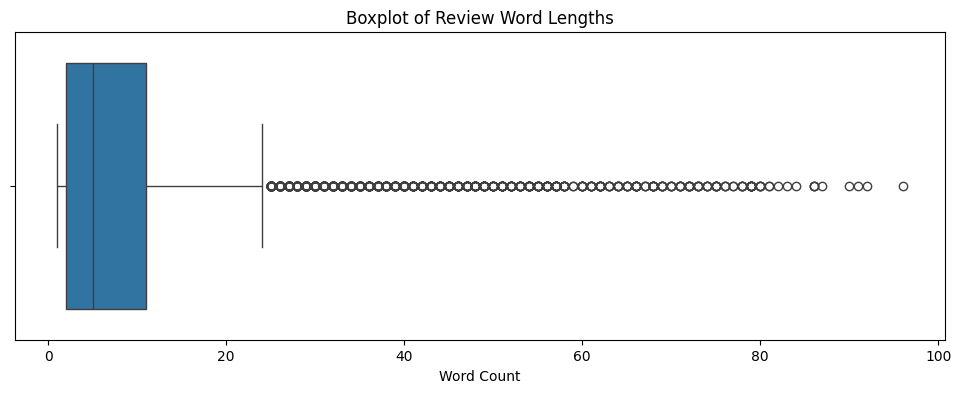

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

word_lengths = df['content'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 4))
sns.boxplot(x=word_lengths)
plt.xlabel("Word Count")
plt.title("Boxplot of Review Word Lengths")
plt.show()

In [ ]:
df = df[(df['content'].str.split().str.len() >= 4) &
        (df['content'].str.split().str.len() < 100)]

df.head()

,content,score
0,"hey admin, ku harap update berikutnya aplikasi...",4
1,Gak ada lawan. Pengalaman interface yang luar ...,5
2,Kelebihan : Chat Support cepat dijawab dan dil...,4
3,Charting masih pinjam punya tradingview. Indik...,1
4,Agak males ah klo misal hapus akun terus no sa...,1


In [ ]:
df['casefold'] = df['content'].str.lower()

df.head()

,content,score,casefold
0,"hey admin, ku harap update berikutnya aplikasi...",4,"hey admin, ku harap update berikutnya aplikasi..."
1,Gak ada lawan. Pengalaman interface yang luar ...,5,gak ada lawan. pengalaman interface yang luar ...
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,kelebihan : chat support cepat dijawab dan dil...
3,Charting masih pinjam punya tradingview. Indik...,1,charting masih pinjam punya tradingview. indik...
4,Agak males ah klo misal hapus akun terus no sa...,1,agak males ah klo misal hapus akun terus no sa...


In [ ]:
import re

def cleaning(text):
    content = re.sub(r"&\w+;", " ", text)             # hapus HTML entities (&amp;, &quot;, dll.)
    content = re.sub(r"[^a-z]", " ", content)         # hapus semua karakter kecuali a-z
    content = re.sub(r"\t", " ", content)             # ganti tab dengan spasi
    content = re.sub(r"\n", " ", content)             # ganti new line dengan spasi
    content = re.sub(r"\s+", " ", content)            # ganti spasi > 1 dengan 1 spasi
    content = re.sub(r"(.)\1{2,}", r"\1\1", content)  # ganti huruf berulang ≥ 3 jadi 2
    content = content.strip()                         # hapus spasi di awal dan akhir
    return content

df['remove noise'] = df['casefold'].apply(cleaning)
df.head()

,content,score,casefold,remove noise
0,"hey admin, ku harap update berikutnya aplikasi...",4,"hey admin, ku harap update berikutnya aplikasi...",hey admin ku harap update berikutnya aplikasi ...
1,Gak ada lawan. Pengalaman interface yang luar ...,5,gak ada lawan. pengalaman interface yang luar ...,gak ada lawan pengalaman interface yang luar b...
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,kelebihan : chat support cepat dijawab dan dil...,kelebihan chat support cepat dijawab dan dilay...
3,Charting masih pinjam punya tradingview. Indik...,1,charting masih pinjam punya tradingview. indik...,charting masih pinjam punya tradingview indika...
4,Agak males ah klo misal hapus akun terus no sa...,1,agak males ah klo misal hapus akun terus no sa...,agak males ah klo misal hapus akun terus no sa...


In [ ]:
import json

with open("/content/merged_slang_dict.json", "r", encoding="utf-8") as f:
    slang_dict = json.load(f)

def normalize_slang(text: str, slang_dict: dict) -> str:

    tokens = re.findall(r"\w+|\S", text.lower())

    normalized_tokens = [
        slang_dict.get(token, token) for token in tokens
    ]

    return " ".join(normalized_tokens)

df['slang'] = df['remove noise'].apply(lambda x: normalize_slang(x, slang_dict))
df.head()

,content,score,casefold,remove noise,slang
0,"hey admin, ku harap update berikutnya aplikasi...",4,"hey admin, ku harap update berikutnya aplikasi...",hey admin ku harap update berikutnya aplikasi ...,he admin ku harap pembaruan berikutnya aplikas...
1,Gak ada lawan. Pengalaman interface yang luar ...,5,gak ada lawan. pengalaman interface yang luar ...,gak ada lawan pengalaman interface yang luar b...,tidak ada lawan pengalaman interface yang luar...
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,kelebihan : chat support cepat dijawab dan dil...,kelebihan chat support cepat dijawab dan dilay...,kelebihan chat support cepat dijawab dan dilay...
3,Charting masih pinjam punya tradingview. Indik...,1,charting masih pinjam punya tradingview. indik...,charting masih pinjam punya tradingview indika...,charting masih pinjam punya tradingview indika...
4,Agak males ah klo misal hapus akun terus no sa...,1,agak males ah klo misal hapus akun terus no sa...,agak males ah klo misal hapus akun terus no sa...,agak malas ah kalau misal hapus akun terus no ...


In [ ]:
txt = open('stopwords-id-filtered.txt')
stopwords =  txt.read().splitlines()

if ["nya"] not in stopwords:
    stopwords.append("nya")

def removeStopwords(text):
  new = []
  for word in text.split():
    if word in stopwords:
      continue
    else:
      new.append(word)
  new = ' '.join(new)
  return new

df['stopwords'] = df['slang'].apply(removeStopwords)
df.head()

,content,score,casefold,remove noise,slang,stopwords
0,"hey admin, ku harap update berikutnya aplikasi...",4,"hey admin, ku harap update berikutnya aplikasi...",hey admin ku harap update berikutnya aplikasi ...,he admin ku harap pembaruan berikutnya aplikas...,he admin ku harap pembaruan aplikasi mode land...
1,Gak ada lawan. Pengalaman interface yang luar ...,5,gak ada lawan. pengalaman interface yang luar ...,gak ada lawan pengalaman interface yang luar b...,tidak ada lawan pengalaman interface yang luar...,tidak lawan pengalaman interface fitur komplit...
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,kelebihan : chat support cepat dijawab dan dil...,kelebihan chat support cepat dijawab dan dilay...,kelebihan chat support cepat dijawab dan dilay...,kelebihan chat support cepat dilayani receh ke...
3,Charting masih pinjam punya tradingview. Indik...,1,charting masih pinjam punya tradingview. indik...,charting masih pinjam punya tradingview indika...,charting masih pinjam punya tradingview indika...,charting pinjam tradingview indikator tidak pa...
4,Agak males ah klo misal hapus akun terus no sa...,1,agak males ah klo misal hapus akun terus no sa...,agak males ah klo misal hapus akun terus no sa...,agak malas ah kalau misal hapus akun terus no ...,malas ah hapus akun no email tidak pakai tidak...


In [ ]:
txt = open('stopwords-id.txt')
stopwords =  txt.read().splitlines()

if ["nya"] not in stopwords:
    stopwords.append("nya")

def removeStopwords(text):
  new = []
  for word in text.split():
    if word in stopwords:
      continue
    else:
      new.append(word)
  new = ' '.join(new)
  return new

df['stopwords2'] = df['slang'].apply(removeStopwords)
df.head()

,content,score,casefold,remove noise,slang,stopwords,stopwords2
0,"hey admin, ku harap update berikutnya aplikasi...",4,"hey admin, ku harap update berikutnya aplikasi...",hey admin ku harap update berikutnya aplikasi ...,he admin ku harap pembaruan berikutnya aplikas...,he admin ku harap pembaruan aplikasi mode land...,he admin ku harap pembaruan aplikasi mode land...
1,Gak ada lawan. Pengalaman interface yang luar ...,5,gak ada lawan. pengalaman interface yang luar ...,gak ada lawan pengalaman interface yang luar b...,tidak ada lawan pengalaman interface yang luar...,tidak lawan pengalaman interface fitur komplit...,lawan pengalaman interface fitur komplit ruang...
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,kelebihan : chat support cepat dijawab dan dil...,kelebihan chat support cepat dijawab dan dilay...,kelebihan chat support cepat dijawab dan dilay...,kelebihan chat support cepat dilayani receh ke...,kelebihan chat support cepat dilayani receh ke...
3,Charting masih pinjam punya tradingview. Indik...,1,charting masih pinjam punya tradingview. indik...,charting masih pinjam punya tradingview indika...,charting masih pinjam punya tradingview indika...,charting pinjam tradingview indikator tidak pa...,charting pinjam tradingview indikator parah da...
4,Agak males ah klo misal hapus akun terus no sa...,1,agak males ah klo misal hapus akun terus no sa...,agak males ah klo misal hapus akun terus no sa...,agak malas ah kalau misal hapus akun terus no ...,malas ah hapus akun no email tidak pakai tidak...,malas ah hapus akun no email pakai detail ales...


In [ ]:
!pip install Sastrawi PySastrawi indonlp==0.3.4 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 20.7 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):
  content = stemmer.stem(text)
  return content

df['stem'] = df['stopwords'].apply(stemming)
df.head()

,content,score,casefold,remove noise,slang,stopwords,stopwords2,stem
0,"hey admin, ku harap update berikutnya aplikasi...",4,"hey admin, ku harap update berikutnya aplikasi...",hey admin ku harap update berikutnya aplikasi ...,he admin ku harap pembaruan berikutnya aplikas...,he admin ku harap pembaruan aplikasi mode land...,he admin ku harap pembaruan aplikasi mode land...,he admin ku harap baru aplikasi mode landscape...
1,Gak ada lawan. Pengalaman interface yang luar ...,5,gak ada lawan. pengalaman interface yang luar ...,gak ada lawan pengalaman interface yang luar b...,tidak ada lawan pengalaman interface yang luar...,tidak lawan pengalaman interface fitur komplit...,lawan pengalaman interface fitur komplit ruang...,tidak lawan alam interface fitur komplit ruang...
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,kelebihan : chat support cepat dijawab dan dil...,kelebihan chat support cepat dijawab dan dilay...,kelebihan chat support cepat dijawab dan dilay...,kelebihan chat support cepat dilayani receh ke...,kelebihan chat support cepat dilayani receh ke...,lebih chat support cepat layan receh kurang er...
3,Charting masih pinjam punya tradingview. Indik...,1,charting masih pinjam punya tradingview. indik...,charting masih pinjam punya tradingview indika...,charting masih pinjam punya tradingview indika...,charting pinjam tradingview indikator tidak pa...,charting pinjam tradingview indikator parah da...,charting pinjam tradingview indikator tidak pa...
4,Agak males ah klo misal hapus akun terus no sa...,1,agak males ah klo misal hapus akun terus no sa...,agak males ah klo misal hapus akun terus no sa...,agak malas ah kalau misal hapus akun terus no ...,malas ah hapus akun no email tidak pakai tidak...,malas ah hapus akun no email pakai detail ales...,malas ah hapus akun no email tidak pakai tidak...


In [ ]:
sentiment_map = {
    5: 'pos',
    4: 'pos',
    3: 'neg',
    2: 'neg',
    1: 'neg'
}

df['sentiment'] = df['score'].map(sentiment_map)
df.head()

,content,score,casefold,remove noise,slang,stopwords,stopwords2,stem,sentiment
0,"hey admin, ku harap update berikutnya aplikasi...",4,"hey admin, ku harap update berikutnya aplikasi...",hey admin ku harap update berikutnya aplikasi ...,he admin ku harap pembaruan berikutnya aplikas...,he admin ku harap pembaruan aplikasi mode land...,he admin ku harap pembaruan aplikasi mode land...,he admin ku harap baru aplikasi mode landscape...,pos
1,Gak ada lawan. Pengalaman interface yang luar ...,5,gak ada lawan. pengalaman interface yang luar ...,gak ada lawan pengalaman interface yang luar b...,tidak ada lawan pengalaman interface yang luar...,tidak lawan pengalaman interface fitur komplit...,lawan pengalaman interface fitur komplit ruang...,tidak lawan alam interface fitur komplit ruang...,pos
2,Kelebihan : Chat Support cepat dijawab dan dil...,4,kelebihan : chat support cepat dijawab dan dil...,kelebihan chat support cepat dijawab dan dilay...,kelebihan chat support cepat dijawab dan dilay...,kelebihan chat support cepat dilayani receh ke...,kelebihan chat support cepat dilayani receh ke...,lebih chat support cepat layan receh kurang er...,pos
3,Charting masih pinjam punya tradingview. Indik...,1,charting masih pinjam punya tradingview. indik...,charting masih pinjam punya tradingview indika...,charting masih pinjam punya tradingview indika...,charting pinjam tradingview indikator tidak pa...,charting pinjam tradingview indikator parah da...,charting pinjam tradingview indikator tidak pa...,neg
4,Agak males ah klo misal hapus akun terus no sa...,1,agak males ah klo misal hapus akun terus no sa...,agak males ah klo misal hapus akun terus no sa...,agak malas ah kalau misal hapus akun terus no ...,malas ah hapus akun no email tidak pakai tidak...,malas ah hapus akun no email pakai detail ales...,malas ah hapus akun no email tidak pakai tidak...,neg


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
pos,4239
neg,3181


In [ ]:
df_pos = df[df['sentiment'] == 'pos'].sample(n=3181, random_state=42)
df_neg = df[df['sentiment'] == 'neg']

df = pd.concat([df_pos, df_neg], ignore_index=True)

df.value_counts('sentiment')

,count
sentiment,
neg,3181
pos,3181


In [ ]:
df.to_csv('mlft_preprocessedv2.csv', index=False)

In [ ]:
!pip install umap-learn hdbscan gensim bertopic --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 17.1 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from bertopic.representation import OpenAI
from umap.umap_ import UMAP
import hdbscan

import gensim
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

from tqdm import tqdm


def compute_coherence_for_bertopic(topic_model, docs, top_n_words=10, coherence_measure="c_v", skip_topic_minus_one=True):
    """
    Compute a coherence score for a BERTopic model using Gensim’s CoherenceModel.
    Returns (overall_coherence, per_topic_coherence_dict)

    Args:
      topic_model: a fitted BERTopic instance
      docs: list of raw documents (strings)
      top_n_words: number of top words per topic to use
      coherence_measure: one of "c_v", "u_mass", "c_uci", "c_npmi"
      skip_topic_minus_one: whether to skip the “-1” (outlier) topic when computing

    Returns:
      coherence_score (float), dict topic_id → coherence_score
    """

    cleaned = topic_model._preprocess_text(docs)
    analyzer = topic_model.vectorizer_model.build_analyzer()
    tokenized_texts = [analyzer(text) for text in cleaned]


    tokenized_texts = [tokens for tokens in tokenized_texts if len(tokens) > 0]


    dictionary = Dictionary(tokenized_texts)
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]


    topics = topic_model.get_topics()
    topic_word_lists = {}
    for topic_id, word_score_list in topics.items():
        if skip_topic_minus_one and topic_id == -1:
            continue

        top_words = [w for (w, _) in word_score_list[:top_n_words]]
        topic_word_lists[topic_id] = top_words


    topic_lists = list(topic_word_lists.values())


    cm = CoherenceModel(
        topics=topic_lists,
        texts=tokenized_texts,
        dictionary=dictionary,
        coherence=coherence_measure
    )

    overall = cm.get_coherence()
    per_topic = {}
    per = cm.get_coherence_per_topic()
    for (topic_id, _), topic_score in zip(topic_word_lists.items(), per):
        per_topic[topic_id] = topic_score

    return overall, per_topic



def evaluate_min_topic_sizes(
    docs,
    embedding_model,
    umap_model,
    vectorizer_model,
    min_topic_size_values=[50, 100, 150, 200],
    **bertopic_kwargs
):
    """
    For each candidate min_topic_size (i.e. min_cluster_size for HDBSCAN),
    fit a BERTopic model, compute coherence (c_v and c_npmi), and return comparison.

    Args:
      docs: list of documents (strings)
      embedding_model, umap_model: passed to BERTopic
      min_topic_size_values: list of integers to try
      bertopic_kwargs: other keyword args for BERTopic (besides hdbscan_model)

    Returns:
      results: dict mapping min_topic_size -> dict with keys:
        "model", "coherence", "per_topic_coherence", "topics_info"
    """
    results = {}

    for m in tqdm(min_topic_size_values, desc="Trying min_topic_size"):

        hdb = hdbscan.HDBSCAN(
            min_cluster_size=m,
            metric="euclidean",
            cluster_selection_method="eom",
            prediction_data=True
        )


        topic_model = BERTopic(
            embedding_model=embedding_model,
            umap_model=umap_model,
            hdbscan_model=hdb,
            vectorizer_model=vectorizer_model,
            **bertopic_kwargs
        )

        topics, probs = topic_model.fit_transform(docs)


        coh_cv, per_topic_cv = compute_coherence_for_bertopic(
            topic_model, docs, top_n_words=10, coherence_measure="c_v"
        )
        coh_npmi, per_topic_npmi = compute_coherence_for_bertopic(
            topic_model, docs, top_n_words=10, coherence_measure="c_npmi"
        )

        info = topic_model.get_topic_info()

        results[m] = {
            "model": topic_model,
            "coherence": {
                "c_v": coh_cv,
                "c_npmi": coh_npmi,
            },
            "per_topic_coherence": {
                "c_v": per_topic_cv,
                "c_npmi": per_topic_npmi,
            },
            "topics_info": info,
        }

    return results

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

with open('stopwords-id.txt', 'r', encoding='utf-8') as f:
    indonesian_stopwords = [line.strip() for line in f.readlines()]

vectorizer_model = CountVectorizer(stop_words=indonesian_stopwords)

In [ ]:
embedding_model = SentenceTransformer("LazarusNLP/all-indo-e5-small-v4")

umap_model = UMAP(
    n_neighbors=15,
    n_components=5,
    min_dist=0.0,
    metric="cosine",
    random_state=42,
)

docs = df["slang"].dropna().astype(str).tolist()

results = evaluate_min_topic_sizes(
    docs,
    embedding_model,
    umap_model,
    vectorizer_model,
    min_topic_size_values=[50, 100, 150, 200],
    verbose=True
)

for m, res in results.items():
    cv = res["coherence"]["c_v"]
    npmi = res["coherence"]["c_npmi"]
    n_topics = len(res["topics_info"])
    print(f"min_topic_size = {m}: c_v = {cv:.4f}, c_npmi = {npmi:.4f}, number of topics = {n_topics}")

Trying min_topic_size:   0%|          | 0/4 [00:00<?, ?it/s]2025-12-15 16:02:24,019 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/199 [00:00<?, ?it/s]

2025-12-15 16:02:27,323 - BERTopic - Embedding - Completed ✓
2025-12-15 16:02:27,324 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-15 16:02:41,030 - BERTopic - Dimensionality - Completed ✓
2025-12-15 16:02:41,032 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-15 16:02:41,439 - BERTopic - Cluster - Completed ✓
2025-12-15 16:02:41,446 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-15 16:02:41,578 - BERTopic - Representation - Completed ✓
Trying min_topic_size:  25%|██▌       | 1/4 [00:19<00:59, 19.69s/it]2025-12-15 16:02:43,709 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/199 [00:00<?, ?it/s]

2025-12-15 16:02:46,926 - BERTopic - Embedding - Completed ✓
2025-12-15 16:02:46,927 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-15 16:03:01,486 - BERTopic - Dimensionality - Completed ✓
2025-12-15 16:03:01,488 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-15 16:03:01,850 - BERTopic - Cluster - Completed ✓
2025-12-15 16:03:01,856 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-15 16:03:01,941 - BERTopic - Representation - Completed ✓
Trying min_topic_size:  50%|█████     | 2/4 [00:39<00:39, 19.57s/it]2025-12-15 16:03:03,202 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/199 [00:00<?, ?it/s]

2025-12-15 16:03:06,885 - BERTopic - Embedding - Completed ✓
2025-12-15 16:03:06,887 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-15 16:03:20,558 - BERTopic - Dimensionality - Completed ✓
2025-12-15 16:03:20,559 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-15 16:03:21,003 - BERTopic - Cluster - Completed ✓
2025-12-15 16:03:21,008 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-15 16:03:21,086 - BERTopic - Representation - Completed ✓
Trying min_topic_size:  75%|███████▌  | 3/4 [00:58<00:19, 19.31s/it]2025-12-15 16:03:22,203 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/199 [00:00<?, ?it/s]

2025-12-15 16:03:25,432 - BERTopic - Embedding - Completed ✓
2025-12-15 16:03:25,433 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-15 16:03:38,727 - BERTopic - Dimensionality - Completed ✓
2025-12-15 16:03:38,728 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-15 16:03:39,286 - BERTopic - Cluster - Completed ✓
2025-12-15 16:03:39,291 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-15 16:03:39,360 - BERTopic - Representation - Completed ✓
Trying min_topic_size: 100%|██████████| 4/4 [01:16<00:00, 19.05s/it]

min_topic_size = 50: c_v = 0.5417, c_npmi = 0.0436, number of topics = 23
min_topic_size = 100: c_v = 0.6230, c_npmi = 0.1027, number of topics = 14
min_topic_size = 150: c_v = 0.6340, c_npmi = 0.1166, number of topics = 9
min_topic_size = 200: c_v = 0.4705, c_npmi = 0.0430, number of topics = 4


In [ ]:
topic_model = results[150]['model']
topic_model.reduce_topics(docs, nr_topics="auto")

topic_info = topic_model.get_topic_info()
print(topic_info)

2025-12-15 16:03:40,238 - BERTopic - Topic reduction - Reducing number of topics
2025-12-15 16:03:40,247 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-15 16:03:40,313 - BERTopic - Representation - Completed ✓
2025-12-15 16:03:40,316 - BERTopic - Topic reduction - Reduced number of topics from 9 to 9


   Topic  Count                                Name  \
0     -1   2121      -1_aplikasi_bintang_tolong_jam   
1      0    904  0_aplikasi_login_aplikasinya_bagus   
2      1    834         1_mudah_pemula_bagus_mantap   
3      2    802     2_stockbit_aplikasi_fitur_saham   
4      3    655  3_saham_investasi_belajar_membantu   
5      4    309    4_market_jam_trading_maintenance   
6      5    265                5_rdn_bank_baca_jago   
7      6    253       6_deposit_withdraw_dana_masuk   
8      7    219       7_bursa_jam_maintenance_error   

                                      Representation  \
0  [aplikasi, bintang, tolong, jam, error, mainte...   
1  [aplikasi, login, aplikasinya, bagus, daftar, ...   
2  [mudah, pemula, bagus, mantap, belajar, lengka...   
3  [stockbit, aplikasi, fitur, saham, terima, kas...   
4  [saham, investasi, belajar, membantu, aplikasi...   
5  [market, jam, trading, maintenance, error, buk...   
6  [rdn, bank, baca, jago, rekening, syariat, ind...   
7

In [ ]:
topics, probs = topic_model.fit_transform(docs)

new_topics = topic_model.reduce_outliers(documents=docs, topics=topics, strategy="embeddings")

print(pd.Series(new_topics).value_counts())

2025-12-15 16:03:40,378 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/199 [00:00<?, ?it/s]

2025-12-15 16:03:44,164 - BERTopic - Embedding - Completed ✓
2025-12-15 16:03:44,164 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-15 16:03:57,638 - BERTopic - Dimensionality - Completed ✓
2025-12-15 16:03:57,639 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-15 16:03:58,102 - BERTopic - Cluster - Completed ✓
2025-12-15 16:03:58,103 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-12-15 16:03:58,181 - BERTopic - Representation - Completed ✓
2025-12-15 16:03:58,182 - BERTopic - Topic reduction - Reducing number of topics
2025-12-15 16:03:58,190 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-15 16:03:58,255 - BERTopic - Representation - Completed ✓
2025-12-15 16:03:58,257 - BERTopic - Topic reduction - Reduced number of topics from 9 to 9


 0    1417
 1    1092
 3     897
 2     867
 4     773
 7     503
 6     499
 5     312
-1       2
Name: count, dtype: int64


In [ ]:
topic_model.delete_topics([-1])
topic_model.update_topics(docs, topics=new_topics, vectorizer_model=vectorizer_model)

2025-12-15 16:04:14,747 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [ ]:
coh_cv_100, per_topic_cv_100 = compute_coherence_for_bertopic(
    topic_model, docs, top_n_words=10, coherence_measure="c_v"
)
coh_npmi_100, per_topic_npmi_100 = compute_coherence_for_bertopic(
    topic_model, docs, top_n_words=10, coherence_measure="c_npmi"
)

print("Coherence scores for model_100:")
print(f"  c_v: {coh_cv_100:.4f}")
print(f"  c_npmi: {coh_npmi_100:.4f}")

Coherence scores for model_100:
  c_v: 0.6232
  c_npmi: 0.1099


In [ ]:
for topic_id in topic_info.Topic.values:
    print(f'\n--- Topic {topic_id} ---\n')
    docs = df[df['topic'] == topic_id]['slang'].head(5)
    for i, doc in enumerate(docs, start=1):
        print(f"{i}. {doc}\n")


--- Topic -1 ---

1. jumlah bintang yang berbicara hebat

2. anjing ngebug melulu


--- Topic 0 ---

1. aplikasi sudah bagis fitur san tampilan enak mudah di pahami orang awam seperti saya semoga besok ke depan sudah tidak eror eror lagi

2. semoga aplikasi ini berguna bagi konsumen

3. tambahkan fitur pnl realtime pada fastorder cocok

4. fitur mantap aplikasinya berkembang maju lebih keren

5. admin tolong aplikasi nya di tingkatkan lagi suka ke close tidak sengaja jadi keluar masuk terus


--- Topic 1 ---

1. saya saya puas terima kasih

2. good semoga sukses sellalu

3. cocok bisa belajar dulu

4. hell yeaah love it

5. baru mulai dan masih belajar


--- Topic 2 ---

1. sangat membantu terima kasih stockbit

2. bagus untuk pemula yang mau terjuan ke dunia persahaman sebelum ke crypto tapi untuk admin stockbit tolong pembelian saham dan penjualan saham saya di percepat soal nya mulai tadi pending melulu dan pas beli e ipo juga

3. setelah bintang naik ke bintang terima kasih stockb

In [ ]:
df.to_csv('mlft_preprocessed_topic.csv', index=False)